# Data Analysis Interview Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Load Data
with open("logins.json","r") as json_file:
     Log = json.load(json_file)

In [3]:
# Convert Log into a Pandas Dataframe
log=pd.DataFrame(Log)
# Convert login_time object column into datetime
log['login_time']=pd.to_datetime(log['login_time'])
# Reindex the dataframe with the login_time column
log=log.reindex(log['login_time'])
# New column
log['total']=1
# Erase the column login_time
log = log.drop(['login_time'],axis=1)
log.head()

,total
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [4]:
log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
total    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [5]:
# aggregate login counts based on 15 min time intervals
log_aggr=log['total'].resample('15T').count()
print(log_aggr.shape)
log_aggr.head()

(9788,)


login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: total, dtype: int64

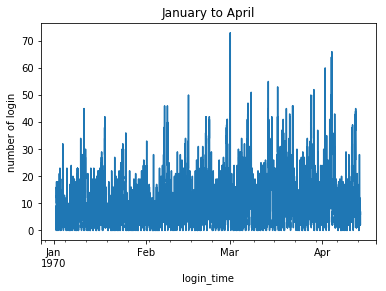

In [6]:
# Visualisation all the dataframe
log_aggr.plot(title='January to April')
plt.ylabel('number of login')
plt.show()

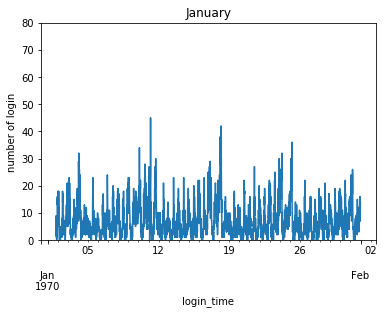

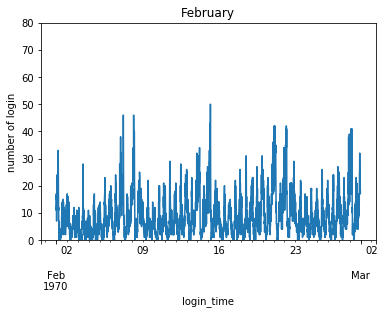

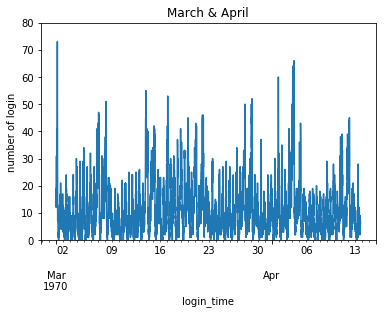

In [7]:
# Visualisation by month
# January
log_aggr.loc['1970-01-01':'1970-01-31'].plot(title='January')
plt.ylim(0,80)
plt.ylabel('number of login')
plt.show()
# February
log_aggr.loc['1970-02-01':'1970-02-28'].plot(title='February')
plt.ylim(0,80)
plt.ylabel('number of login')
plt.show()
# March & April
log_aggr.loc['1970-03-01':'1970-04-30'].plot(title='March & April')
plt.ylim(0,80)
plt.ylabel('number of login')
plt.show()

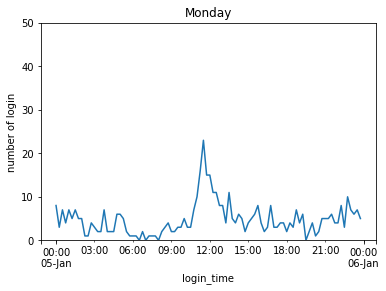

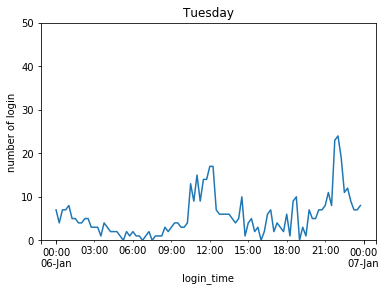

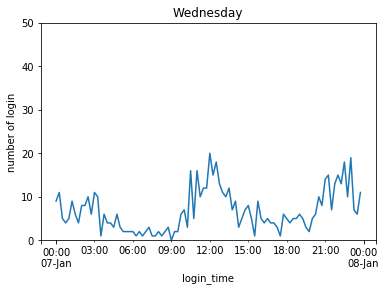

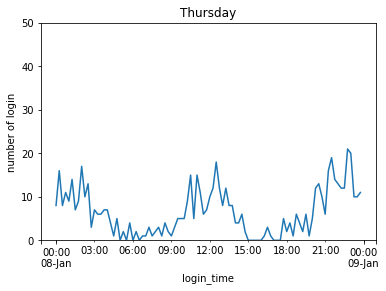

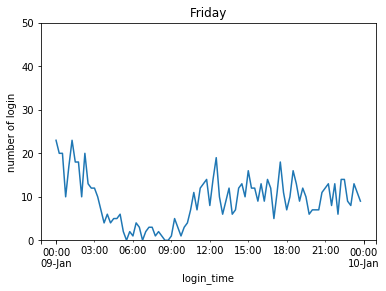

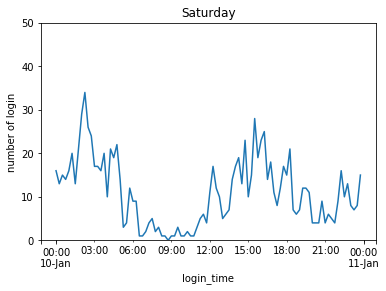

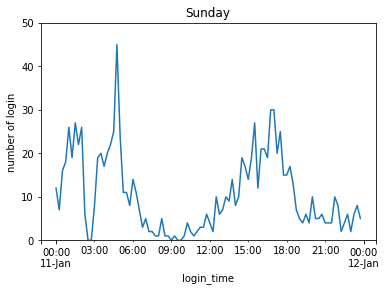

In [8]:
# Visualisation by day
# Monday
log_aggr.loc['1970-01-05'].plot(title='Monday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Tuesda
log_aggr.loc['1970-01-06'].plot(title='Tuesday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Wednesday
log_aggr.loc['1970-01-07'].plot(title='Wednesday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Thursda
log_aggr.loc['1970-01-08'].plot(title='Thursday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Friday
log_aggr.loc['1970-01-09'].plot(title='Friday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Saturday
log_aggr.loc['1970-01-10'].plot(title='Saturday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()
# Sunday
log_aggr.loc['1970-01-11'].plot(title='Sunday')
plt.ylim(0,50)
plt.ylabel('number of login')
plt.show()

#### According to the plots, we can see first there is an increase of the number of logins during March compared to January, February and the beginning of April. Then, we can also see there is a recurring pattern across all of them. There is an increase of about fifty percent in the number of logins during the week end. Finally, when we took a look at each days during a week, we can see different patterns. During the Monday, we can observe an increase of the activity between 10 a.m. and 15 p.m. with a pick at noon. We can find the same pattern for the next four days with an other increase of the activity but smaller during the night with a pick around 10 p.m. During the week end the pattern is different, there are two increases of the activity, one during the afternoon with a pick around 5 p.m. and one during the night with a pick around 3 - 4 a.m.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

#### Answers:
#### 1. The key measure of success of this experiment could be a register containing all the times a driver partner has crossed the toll bridge so that we can know the number of times the driver partners have crossed the bridge, at what time, on what day of the week or weekend and in which direction they crossed the toll bridge.  

#### 2. We need to have two variables, the number of times the driver partners have crossed the bridge per hours during several month before the experiment (variable 1) et the number of times the driver partners have crossed the bridge per hours after the experiment is set up (variable 2). It is beter if the months match for both variables.  
#### The null hypothesis is: the number of times driver have crossed the bridge is not affected by the offer to reimburse all toll costs. Or the mean of the difference between variable 1 and variable 2 is equal to zero.
#### We can use a frequentist statistical testing to see if we are going to reject the null hypothesis or not. We have to calculate two variables: 
#### - the mean of the difference between the mean of the variable 1 and the mean of the variable 2. 
#### - the critical value which is the z statical (1.65 for alpha < 5%) multiply by the square root of the addidtion of the two standard error of both variables divided by the size of their distribution. 
#### If the mean of the difference between both variable is bigger than the critical value, we are below the threshold of 5% and we reject the null hypothesis. If this is the case, we can say that the number of times driver have crossed the bridge is affected by the offer to reimburse all toll costs and the offer is a good idea. If it's not the case, we validate the null hypothesis, the offer is not a good idea, we can recomande to stop it to find a better idea. 
#### Finally, we can plot the data to observe the distributions across different days in a week and in a week end to see if it's really interesting to keep the offer to reimburse all toll costs all the time or not. 

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 
The data is in the attached file ultimate_data_challenge.json. 
See below for a detailed description of the dataset. 
Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Question 1

In [9]:
# Load Data
with open("ultimate_data_challenge.json","r") as json_file:
     Data = json.load(json_file)

In [10]:
# Convert Data into a Pandas dataframe
data=pd.DataFrame(Data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Cleaning data

In [12]:
# Convert last_trip_date and signup_date columns into datetime columns
data['last_trip_date']=pd.to_datetime(data['last_trip_date'])
data['signup_date']=pd.to_datetime(data['signup_date'])

In [13]:
# New column 'duration_of_use'
data['duration_of_use']=data.last_trip_date-data.signup_date
data.duration_of_use=data.duration_of_use/ np.timedelta64(1,'D') 

In [14]:
# replace NaN value of column avg_rating_by_driver and avg_rating_of_driver by the mean the column
data.avg_rating_by_driver=data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.mean(axis=0))
data.avg_rating_of_driver=data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.mean(axis=0))

In [15]:
# remove last_trip_date and signup_date
data=data.drop(['last_trip_date','signup_date'],axis=1)

In [16]:
# remove NaN rows of 'phone' column
data=data[data.phone.notnull()]

Visualisation data

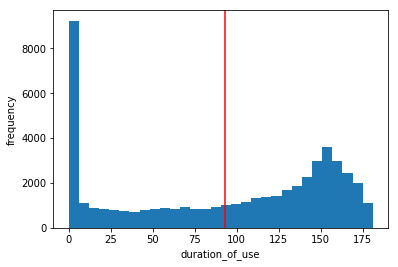

In [17]:
# duration_of_use distribution
mean=np.mean(data.duration_of_use)
sns.set
_=plt.hist(data.duration_of_use,bins=30)
_=plt.axvline(mean,color='red')
_=plt.xlabel('duration_of_use')
_=plt.ylabel('frequency')
plt.show()

We can observe that there is a lot of user that use the service only one or two days. The maximum value of use of the service is approximately 175 days (6 months).

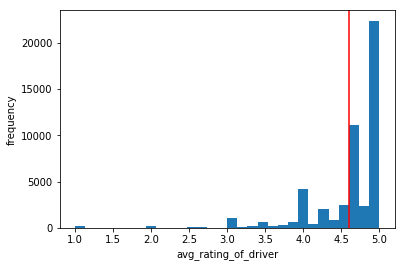

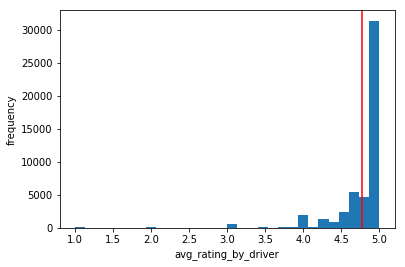

In [18]:
# avg_rating_of_driver distribution
mean=np.mean(data.avg_rating_of_driver)
sns.set
_=plt.hist(data.avg_rating_of_driver,bins=30)
_=plt.axvline(mean,color='red')
_=plt.xlabel('avg_rating_of_driver')
_=plt.ylabel('frequency')
plt.show()

# avg_rating_by_driver distribution
mean=np.mean(data.avg_rating_by_driver)
sns.set
_=plt.hist(data.avg_rating_by_driver,bins=30)
_=plt.axvline(mean,color='red')
_=plt.xlabel('avg_rating_by_driver')
_=plt.ylabel('frequency')
plt.show()

The distribution of notes is done on a very small scale (between 4 and 5). 

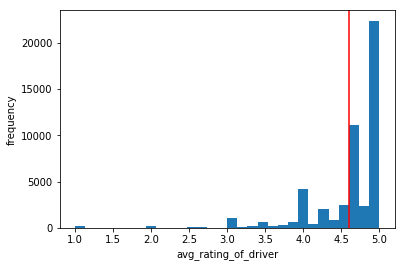

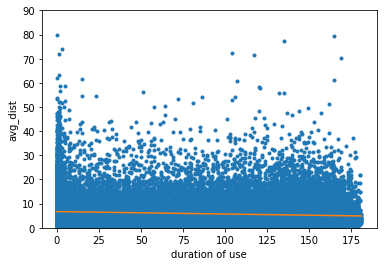

In [19]:
# avg_rating_of_driver distribution
mean=np.mean(data.avg_rating_of_driver)
sns.set
_=plt.hist(data.avg_rating_of_driver,bins=30)
_=plt.axvline(mean,color='red')
_=plt.xlabel('avg_rating_of_driver')
_=plt.ylabel('frequency')
plt.show()# Relation between duration_of_use and avg_dist
X=data.duration_of_use
Y=data.avg_dist

# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept

# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(0,90)
_=plt.xlabel('duration of use')
_=plt.ylabel('avg_dist')
plt.show()

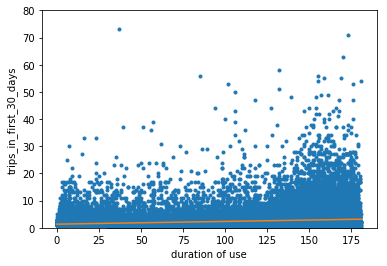

In [20]:
# Relation between duration_of_use and trips_in_first_30_days
X=data.duration_of_use
Y=data.trips_in_first_30_days

# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept

# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(0,80)
_=plt.xlabel('duration of use')
_=plt.ylabel('trips_in_first_30_days')
plt.show()

It seems to have no relation between the duration of use of the sevice and the average distance per trip or the number of trips the users took in the first 30 days.

                duration_of_use
city                           
Astapor               82.392677
King's Landing       116.712696
Winterfell            90.044800


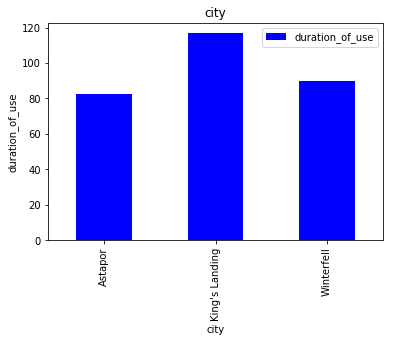

In [21]:
# avg_distribution by city
data_by_city=data.groupby(['city'])[['duration_of_use']].mean()
print(data_by_city)
data_by_city.plot(y='duration_of_use',kind='bar',color='b')
plt.title('city')
plt.ylabel('duration_of_use')
plt.show()

                     duration_of_use
ultimate_black_user                 
False                      84.833054
True                      106.398077


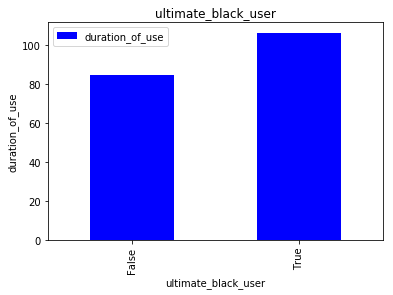

In [22]:
# avg_distribution by ultimate_black_user
data_by_ultimate_user=data.groupby(['ultimate_black_user'])[['duration_of_use']].mean()
print(data_by_ultimate_user)
data_by_ultimate_user.plot(y='duration_of_use',kind='bar',color='b')
plt.title('ultimate_black_user')
plt.ylabel('duration_of_use')
plt.show()

         duration_of_use
phone                   
Android        75.372520
iPhone        100.548869


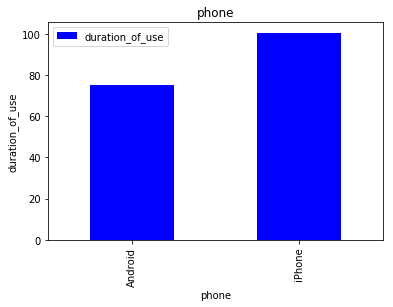

In [23]:
# avg_distribution by phone
data_by_phone=data.groupby(['phone'])[['duration_of_use']].mean()
print(data_by_phone)
data_by_phone.plot(y='duration_of_use',kind='bar',color='b')
plt.title('phone')
plt.ylabel('duration_of_use')
plt.show()

We observe differences in the mean of the number of day between the signup day and the last trip date depending the city, the phone or the use of the ultimate black. 

In [24]:
# transforme object and boolean values into float or integer values 
data.phone[data.phone=='Android']=0
data.phone[data.phone=='iPhone']=1
data.phone=data.phone.astype(int)
data.city[data.city=='Astapor']=0
data.city[data.city=="King's Landing"]=1
data.city[data.city=='Winterfell']=2
data.city=data.city.astype(int)
data.ultimate_black_user[data.ultimate_black_user==False]=0
data.ultimate_black_user[data.ultimate_black_user==True]=1

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.p

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null int32
phone                     49604 non-null int32
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null float64
weekday_pct               49604 non-null float64
duration_of_use           49604 non-null float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 4.2 MB


#### Question 2

In [26]:
# Linear regression statistic
results = smf.ols('duration_of_use ~ avg_dist + avg_rating_by_driver + avg_rating_of_driver + avg_surge + surge_pct + trips_in_first_30_days + weekday_pct', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        duration_of_use   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     270.3
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:57:14   Log-Likelihood:            -2.7424e+05
No. Observations:               49604   AIC:                         5.485e+05
Df Residuals:                   49596   BIC:                         5.486e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                123

All the features have a significant p_value (< 0.05). The surge_pct, the trips_in_first_30_days and the weekday_pct have positive coefficients, the duration of use the service increases when the value of these three features also increase. The avg_dist, the avg_rating_by_driver, the avg_rating_of_driver, the avg_surge and the avg_surge has negative coefficient, the duration of use the service increases when the value of this feature decreases. 
If the avg_dist decreases by one unit (1 mile), the number of days using the service increases by 0.98. If the avg_rating_by_driver decreases by one unit (1 point), the number of days using the service increases by 2.64. If the avg_rating_of_driver decreases by one unit (1 point), the number of days using the service increases by 1.09. If the avg_surge decreases by one unit, the number of days using the service increases by 14.78. If the surge_pct increases by one unit (1 percent), the number of days using the service increases by 0.12. If the trips_in_first_30_days increases by one unit, the number of days using the service increases by 2.46. If the weekday_pct increases by one unit (1 percent), the number of days using the service increases by 0.038.

In [27]:
# Get X and y
X = data.drop(['duration_of_use'],axis=1)
y = data.duration_of_use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)

In [28]:
# Random Forest Model: tune hyperparameter
param_grid={'max_depth':np.arange(1,10)}
regr=RandomForestRegressor(random_state=21)
regr_cv=GridSearchCV(regr,param_grid,cv=5)
regr_cv.fit(X_train,y_train)
print('Best parameter:',regr_cv.best_params_)
print('Best score:',regr_cv.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Best parameter: {'max_depth': 9}
Best score: 0.5529587746617821


In [29]:
# Random Forest Model: model
regr=RandomForestRegressor(max_depth=9,random_state=21)
regr.fit(X_train , y_train)
print('R² Score train data =',regr.score(X_train,y_train))
print('R² Score test data =',regr.score(X_test,y_test))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R² Score train data = 0.5971782050188179
R² Score test data = 0.5566994781855423


In [30]:
# Feature importance of the model
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
avg_rating_by_driver,0.326691
trips_in_first_30_days,0.265758
weekday_pct,0.257126
surge_pct,0.036742
avg_dist,0.028532
city,0.022783
phone,0.018467
avg_surge,0.016329
avg_rating_of_driver,0.015529
ultimate_black_user,0.012043


#### To predict the rider retention, we choose to predict the column 'duration_of_use', the number of days between the signup date and the last trip date. And we choose Random Forest Regressor as machine learning algorithm. It is easy to tune its hyperparameters and it is good for the small dataset with only few features. The accuracy of the train data is 0.60 and the accuracy of the test data is 0.56. Even if the accuracy is not very high, the model is pretty good because there is not overfitting. But to be sure of the model, it will be better if we had access to the number of time that clients use the service during the 6 months. Indeed, a client could use the service a first time at the signup date and only a second time to the last trip date for exemple. The ratio between the frequency of use of the service and the duration of use of the service could have been a good value to predict in order to predict rider retention.

#### Question 3

#### The most important features of the model are: avg_rating_by_driver, trips_in_first_30_days and weekday_pct. We saw with the linear regression statistics that the coefficient of avg_rating_by_driver is negative, the clients with lower rates have a higher number of use of the service. The rates are distributed on very small range and more a client have used the service and the more likely he is to lower the average of his rate. trips_in_first_30_days have a positive coefficient, more a client has a high number of trip the first 30 days and more he will use the service longer. And the coefficient of weekday_pct is also positive. The clients who have the higher percent of trips during weekdays use the service longer. It could be a good idea that Ultimate proposes an offer the first month during the weekdays to encourage clients to use the service multiple times to retain them in the longer term. 